# Cold Spray Simulation

This notebook demonstrates the assumptions needed to simulate the CSAM proccess using Matplotlib and SciPy.



- First we assume that the powder deposition of a stationary nozzle follows a Gaussian distribution. The Gaussian curve is generated using a bivariate normal distribution with specified mean and covariance matrix. 
- However in practice nozzles are typically attached to a robot and are programmed to follow a raster pattern (a rectangular path). Thus to simulate a raster pattern we simply plot the sum of all the Gaussian curves along it's path.




In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

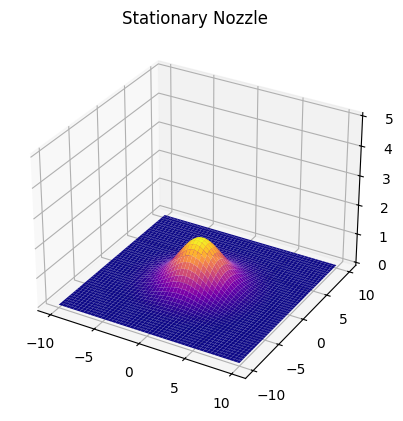

In [23]:
# Define the grid of x and y values
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
points = np.dstack((X, Y))

# Define the mean and covariance matrix
mean = [0, 0]
scale = 50
sigma = 5
covariance_matrix = [[sigma, 0], [0, sigma]]

# Create the Gaussian distribution
bivariate_gauss = multivariate_normal(mean=mean, cov=covariance_matrix)
Z = bivariate_gauss.pdf(points)*scale

# Plot the Gaussian curve
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_zlim(0, 5)
ax.set_title('Stationary Nozzle')
plt.show()


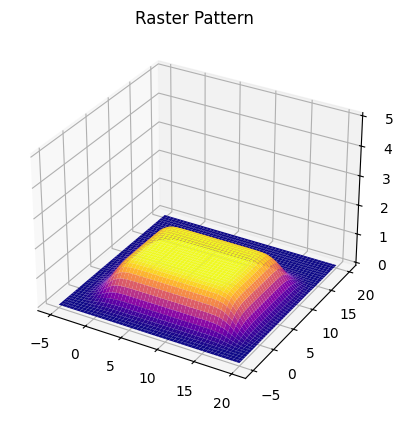

In [21]:
# Define grid of x and y values
x = np.linspace(-5, 20, 1000)
y = np.linspace(-5, 20, 1000)
X, Y = np.meshgrid(x, y)
points = np.dstack((X, Y))

scale = 5
sigma = 2
mean = [0, 0]
covariance_matrix = [[sigma, 0], [0, sigma]]  # Identity matrix

cs_deposit = []
for j in range(9):
    mean[0] = 2*j
    for i in range(7):
        mean[1] = 2*i
        bivariate_gauss = multivariate_normal(mean=mean, cov=covariance_matrix)
        Z = bivariate_gauss.pdf(points) * scale 
        cs_deposit.append(Z)
    
cs_deposit = sum(cs_deposit)

# Plot the bivariate Gaussian PDF as a surface plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, cs_deposit, cmap='plasma')
ax.set_zlim(0, 5)
ax.set_title('Raster Pattern')
plt.show()


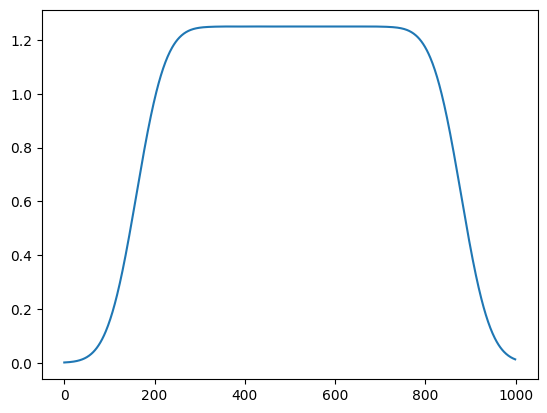

In [20]:
angle_of_repose = cs_deposit[500,:] #horizontal cross section

plt.plot(angle_of_repose)
plt.show()